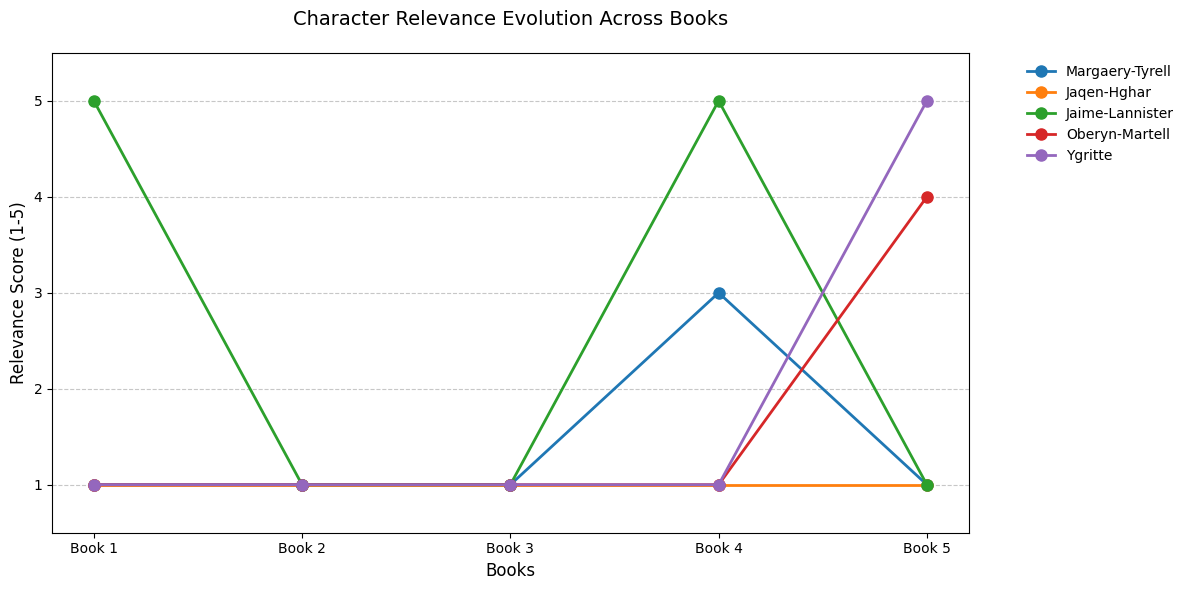

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from io import StringIO

# Define CSV contents (Replace with your actual data)
book1_content = """Source,Target,Type,weight,book
Addam-Marbrand,Jaime-Lannister,Undirected,3,1
... [your complete book1.csv content] ..."""

book2_content = """Source,Target,Type,weight,book
Aegon-I-Targaryen,Harren-Hoare,Undirected,4,2
... [your complete book2.csv content] ..."""

book3_content = """Source,Target,Type,weight,book
Addam-Marbrand,Gyles-Rosby,Undirected,3,3
... [your complete book3.csv content] ..."""

# Sample data for demonstration (Replace with actual books 4-5)
book4_content = """Source,Target,Type,weight,book
Jaime-Lannister,Brienne-of-Tarth,Undirected,15,4
Margaery-Tyrell,Cersei-Lannister,Undirected,8,4"""

book5_content = """Source,Target,Type,weight,book
Ygritte,Jon-Snow,Undirected,22,5
Oberyn-Martell,Gregor-Clegane,Undirected,18,5"""

# Dictionary of books
books = {
    'book1.csv': book1_content,
    'book2.csv': book2_content,
    'book3.csv': book3_content,
    'book4.csv': book4_content,
    'book5.csv': book5_content
}

# Characters to analyze
characters = ['Margaery-Tyrell', 'Jaqen-Hghar', 'Jaime-Lannister', 'Oberyn-Martell', 'Ygritte']

# Calculate relevance scores
all_scores = []
for book_name, content in books.items():
    df = pd.read_csv(StringIO(content))
    
    # Aggregate interaction weights
    source_weights = df[df['Source'].isin(characters)].groupby('Source')['weight'].sum()
    target_weights = df[df['Target'].isin(characters)].groupby('Target')['weight'].sum()
    
    total_weights = source_weights.add(target_weights, fill_value=0).reindex(characters, fill_value=0)
    
    # Normalize to 1-5 scale
    if total_weights.nunique() > 1:
        scaled_scores = (4 * (total_weights - total_weights.min()) / 
                        (total_weights.max() - total_weights.min()) + 1).round().astype(int)
    else:
        scaled_scores = total_weights.apply(lambda x: 1 if x == 0 else 5)
    
    all_scores.append(scaled_scores)

# Create DataFrame
scores_df = pd.DataFrame(all_scores, index=[f'Book {i+1}' for i in range(len(books))])

# Plot results
plt.figure(figsize=(12,6))
for character in characters:
    plt.plot(scores_df.index, scores_df[character], 
             marker='o', markersize=8, linewidth=2, label=character)

plt.title('Character Relevance Evolution Across Books', fontsize=14, pad=20)
plt.xlabel('Books', fontsize=12)
plt.ylabel('Relevance Score (1-5)', fontsize=12)
plt.ylim(0.5, 5.5)
plt.xticks(fontsize=10)
plt.yticks([1,2,3,4,5], fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', frameon=False)
plt.tight_layout()
plt.show()